# Sample classifier with scikit

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

In [2]:
print(digits.data.shape)
print(digits.target.shape)
print(digits.images.shape)
print(digits.images[10])

(1797, 64)
(1797,)
(1797, 8, 8)
[[  0.   0.   1.   9.  15.  11.   0.   0.]
 [  0.   0.  11.  16.   8.  14.   6.   0.]
 [  0.   2.  16.  10.   0.   9.   9.   0.]
 [  0.   1.  16.   4.   0.   8.   8.   0.]
 [  0.   4.  16.   4.   0.   8.   8.   0.]
 [  0.   1.  16.   5.   1.  11.   3.   0.]
 [  0.   0.  12.  12.  10.  10.   0.   0.]
 [  0.   0.   1.  10.  13.   3.   0.   0.]]


In [3]:
from sklearn import svm
clf = svm.SVC(gamma = 0.001, C=100.)

In [4]:
# Train
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
# Predict
predVal = clf.predict(digits.data[-1:])
print(predVal)

[8]


In [6]:
print(digits.target[-1:])

[8]


# Read and parse font file

In [7]:
from fontTools.ttLib import TTFont
font = TTFont('corbel_font.ttf')

## Reference
* http://pyopengl.sourceforge.net/pydoc/fontTools.ttLib.html
* https://searchcode.com/codesearch/view/86910536/

In [8]:
print(len(font.getGlyphNames()))
print(font.getGlyphNames()[20])

1201
Ccaron


In [9]:
font.keys()

['GlyphOrder',
 'head',
 'hhea',
 'maxp',
 'OS/2',
 'hmtx',
 'cmap',
 'fpgm',
 'prep',
 'cvt ',
 'loca',
 'glyf',
 'kern',
 'name',
 'post',
 'gasp',
 'GDEF',
 'GPOS',
 'GSUB',
 'DSIG']

In [10]:
print(font.getGlyphID('Ccaron'))

44


In [11]:
len(font.getGlyphOrder())
mp = font.getGlyphSet()

In [12]:
mp

In [13]:
font.keys()

['GlyphOrder',
 'head',
 'hhea',
 'maxp',
 'OS/2',
 'hmtx',
 'cmap',
 'fpgm',
 'prep',
 'cvt ',
 'loca',
 'glyf',
 'kern',
 'name',
 'post',
 'gasp',
 'GDEF',
 'GPOS',
 'GSUB',
 'DSIG']

In [14]:
len(mp.keys())

1201

In [15]:
aGlyph = mp['A']

In [16]:
aGlyph

In [17]:
import inspect
inspect.getmembers(aGlyph, predicate=inspect.ismethod)

[('__init__',
  <bound method _TTGlyphGlyf.__init__ of <fontTools.ttLib._TTGlyphGlyf object at 0x7f9e4ae6a790>>),
 ('draw',
  <bound method _TTGlyphGlyf.draw of <fontTools.ttLib._TTGlyphGlyf object at 0x7f9e4ae6a790>>)]

In [18]:
cmap = font['cmap']
cmap

<'cmap' table at 7f9e4ae6ab10>

In [19]:
inspect.getmembers(cmap, predicate=inspect.ismethod)

[('__eq__',
  <bound method table__c_m_a_p.__eq__ of <'cmap' table at 7f9e4ae6ab10>>),
 ('__init__',
  <bound method table__c_m_a_p.__init__ of <'cmap' table at 7f9e4ae6ab10>>),
 ('__ne__',
  <bound method table__c_m_a_p.__ne__ of <'cmap' table at 7f9e4ae6ab10>>),
 ('__repr__',
  <bound method table__c_m_a_p.__repr__ of <'cmap' table at 7f9e4ae6ab10>>),
 ('buildReversed',
  <bound method table__c_m_a_p.buildReversed of <'cmap' table at 7f9e4ae6ab10>>),
 ('compile',
  <bound method table__c_m_a_p.compile of <'cmap' table at 7f9e4ae6ab10>>),
 ('decompile',
  <bound method table__c_m_a_p.decompile of <'cmap' table at 7f9e4ae6ab10>>),
 ('fromXML',
  <bound method table__c_m_a_p.fromXML of <'cmap' table at 7f9e4ae6ab10>>),
 ('getcmap',
  <bound method table__c_m_a_p.getcmap of <'cmap' table at 7f9e4ae6ab10>>),
 ('toXML',
  <bound method table__c_m_a_p.toXML of <'cmap' table at 7f9e4ae6ab10>>)]

In [20]:
for table in cmap.tables:
    print(table.platformID)
    print(table.platEncID)
    print(table.language)
#     print(table.cmap)
    print("======================")
    

0
3
0
1
0
0
3
1
0


In [21]:
tabl1 = cmap.tables[0]
# inspect.getmembers(tabl1)
print(tabl1.cmap[65])

tabl2 = cmap.tables[0]
print(tabl2.cmap[65])


A
A


From cmap get the glyphid from character id

In [22]:
from fontTools.pens.ttGlyphPen import TTGlyphPen
pen = TTGlyphPen(font.getGlyphSet())
aGlyph.draw(pen)
print(aGlyph._glyph)

In [23]:
from __future__ import print_function, division, absolute_import
from fontTools.misc.py23 import *

import sympy as sp
import math
from fontTools.pens.basePen import BasePen
from fontTools.pens.transformPen import TransformPen
from fontTools.pens.perimeterPen import PerimeterPen
from fontTools.pens.areaPen import AreaPen
from fontTools.misc.transform import Scale
from fontTools.misc.bezierTools import splitQuadraticAtT, splitCubicAtT
from functools import partial

n = 3 # Max Bezier degree; 3 for cubic, 2 for quadratic

t, x, y = sp.symbols('t x y', real=True)

P = tuple(zip(*(sp.symbols('%s:%d'%(w,n+1), real=True) for w in 'xy')))

# Cubic Bernstein basis functions
BinomialCoefficient = [(1, 0)]
for i in range(1, n+1):
    last = BinomialCoefficient[-1]
    this = tuple(last[j-1]+last[j] for j in range(len(last)))+(0,)
    BinomialCoefficient.append(this)
BinomialCoefficient = tuple(tuple(item[:-1]) for item in BinomialCoefficient)

BernsteinPolynomial = tuple(
    tuple(c * t**i * (1-t)**(n-i) for i,c in enumerate(coeffs))
    for n,coeffs in enumerate(BinomialCoefficient))

BezierCurve = tuple(
    tuple(sum(P[i][j]*bernstein for i,bernstein in enumerate(bernsteins))
        for j in range(2))
    for n,bernsteins in enumerate(BernsteinPolynomial))

def green(f, Bezier=BezierCurve[n]):
    f1 = -sp.integrate(sp.sympify(f), y)
    f2 = f1.subs({x:Bezier[0], y:Bezier[1]})
    return sp.integrate(f2 * sp.diff(Bezier[0], t), (t, 0, 1))

class BezierFuncs(object):

    def __init__(self, symfunc):
        self._symfunc = symfunc
        self._bezfuncs = {}

    def __getitem__(self, i):
        if i not in self._bezfuncs:
            args = []
            for d in range(i+1):
                args.append('x%d' % d)
                args.append('y%d' % d)
            self._bezfuncs[i] = sp.lambdify(args, green(self._symfunc, Bezier=BezierCurve[i]))
        return self._bezfuncs[i]

_BezierFuncs = {}

def getGreenBezierFuncs(func):
    funcstr = str(func)
    global _BezierFuncs
    if not funcstr in _BezierFuncs:
        _BezierFuncs[funcstr] = BezierFuncs(func)
    return _BezierFuncs[funcstr]

def printCache(func):
    funcstr = str(func)
    print("_BezierFuncs['%s'] = [" % funcstr)
    for i in range(n+1):
        print('	lambda P:', green(func, Bezier=BezierCurve[i]), ',')
    print(']')

class GreenPen(BasePen):

    def __init__(self, func, glyphset=None):
        BasePen.__init__(self, glyphset)
        self._funcs = getGreenBezierFuncs(func)
        self.value = 0

    def _moveTo(self, p0):
        self.__startPoint = p0

    def _lineTo(self, p1):
        p0 = self._getCurrentPoint()
        self.value += self._funcs[1](p0[0],p0[1],p1[0],p1[1])

    def _qCurveToOne(self, p1, p2):
        p0 = self._getCurrentPoint()
        self.value += self._funcs[2](p0[0],p0[1],p1[0],p1[1],p2[0],p2[1])

    def _curveToOne(self, p1, p2, p3):
        p0 = self._getCurrentPoint()
        self.value += self._funcs[3](p0[0],p0[1],p1[0],p1[1],p2[0],p2[1],p3[0],p3[1])

    def _closePath(self):
        p0 = self._getCurrentPoint()
        if p0 != self.__startPoint:
            p1 = self.__startPoint
            self.value += self._funcs[1](p0[0],p0[1],p1[0],p1[1])

#AreaPen = partial(GreenPen, func=1)
Moment1XPen = partial(GreenPen, func=x)
Moment1YPen = partial(GreenPen, func=y)
Moment2XXPen = partial(GreenPen, func=x*x)
Moment2YYPen = partial(GreenPen, func=y*y)
Moment2XYPen = partial(GreenPen, func=x*y)



#
# Glyph statistics object
#

class GlyphStatistics(object):

    def __init__(self, glyph, transform=None, glyphset=None):
        self._glyph = glyph
        self._glyphset = glyphset
        self._transform = transform

    def _penAttr(self, attr):
        internalName = '_'+attr
        if internalName not in self.__dict__:
            Pen = globals()[attr+'Pen']
            pen = transformer = Pen(glyphset=self._glyphset)
            if self._transform:
                transformer = TransformPen(pen, self._transform)
            self._glyph.draw(transformer)
            self.__dict__[internalName] = pen.value
        return self.__dict__[internalName]

    Area = property(partial(_penAttr, attr='Area'))
    Perimeter = property(partial(_penAttr, attr='Perimeter'))
    Moment1X = property(partial(_penAttr, attr='Moment1X'))
    Moment1Y = property(partial(_penAttr, attr='Moment1Y'))
    Moment2XX = property(partial(_penAttr, attr='Moment2XX'))
    Moment2YY = property(partial(_penAttr, attr='Moment2YY'))
    Moment2XY = property(partial(_penAttr, attr='Moment2XY'))

    # TODO Memoize properties below

    # Center of mass
    # https://en.wikipedia.org/wiki/Center_of_mass#A_continuous_volume
    @property
    def MeanX(self):
        return self.Moment1X / self.Area
    @property
    def MeanY(self):
        return self.Moment1Y / self.Area

    # https://en.wikipedia.org/wiki/Second_moment_of_area

    #  Var(X) = E[X^2] - E[X]^2
    @property
    def VarianceX(self):
        return self.Moment2XX / self.Area - self.MeanX**2
    @property
    def VarianceY(self):
        return self.Moment2YY / self.Area - self.MeanY**2

    @property
    def StdDevX(self):
        return self.VarianceX**.5
    @property
    def StdDevY(self):
        return self.VarianceY**.5

    #  Covariance(X,Y) = ( E[X.Y] - E[X]E[Y] )
    @property
    def Covariance(self):
        return self.Moment2XY / self.Area - self.MeanX*self.MeanY

    @property
    def _CovarianceMatrix(self):
        cov = self.Covariance
        return ((self.VarianceX, cov), (cov, self.VarianceY))

    @property
    def _Eigen(self):
        mat = self.CovarianceMatrix
        from numpy.linalg import eigh
        vals,vecs = eigh(mat)
        # Note: we return eigen-vectors row-major, unlike Matlab, et al
        return tuple(vals), tuple(tuple(row) for row in vecs)

    #  Correlation(X,Y) = Covariance(X,Y) / ( StdDev(X) * StdDev(Y)) )
    # https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient
    @property
    def Correlation(self):
        corr = self.Covariance / (self.StdDevX * self.StdDevY)
        if abs(corr) < 1e-3: corr = 0
        return corr

    @property
    def Slant(self):
        slant = self.Covariance / self.VarianceY
        if abs(slant) < 1e-3: slant = 0
        return slant


def test(glyphset, upem, glyphs):
    print('upem', upem)

    for glyph_name in glyphs:
        print()
        print("glyph:", glyph_name)
        glyph = glyphset[glyph_name]
        stats = GlyphStatistics(glyph, transform=Scale(1./upem), glyphset=glyphset)
        for item in dir(stats):
            if item[0] == '_': continue
            print ("%s: %g" % (item, getattr(stats, item)))


In [24]:
from fontTools.pens.transformPen import TransformPen

glyph_name = 'A'
glyphset = font.getGlyphSet()
upem = font['head'].unitsPerEm
print("glyph:", glyph_name)
glyph = font.getGlyphSet()[glyph_name]
stats = GlyphStatistics(glyph, transform=Scale(1./upem), glyphset=glyphset)
for item in dir(stats):
    if item[0] == '_': continue
    print ("%s: %g" % (item, getattr(stats, item)))


glyph: A
Area: -0.119535
Correlation: -0.00222877
Covariance: -5.50465e-05
MeanX: 0.317993
MeanY: 0.295329
Moment1X: -0.0380113
Moment1Y: -0.0353022
Moment2XX: -0.0146222
Moment2XY: -0.0112193
Moment2YY: -0.0138643
Perimeter: 3.17191
Slant: -0.0019136
StdDevX: 0.145622
StdDevY: 0.169605
VarianceX: 0.0212057
VarianceY: 0.0287659


## Try the HDF5 File

In [25]:
import numpy as np
import h5py

smallDataSize = 10000

with h5py.File('/home/agah/FontCase/fonts.hdf5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    data = hf.get('fonts')
    print(data)
    print(data.shape)
    imgC = data[43611,2,:,:]
    imgH = data[43611,7,:,:]
    
    As = data[:smallDataSize,0,:,:]
    Bs = data[:smallDataSize,1,:,:]

List of arrays in this file: 
 [u'fonts']
<HDF5 dataset "fonts": shape (56443, 62, 64, 64), type "|u1">
(56443, 62, 64, 64)


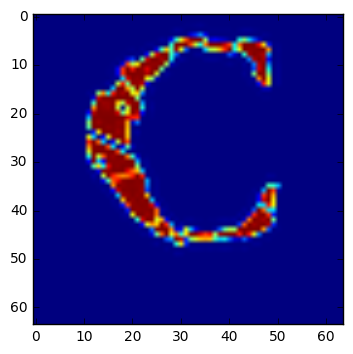

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(imgC)

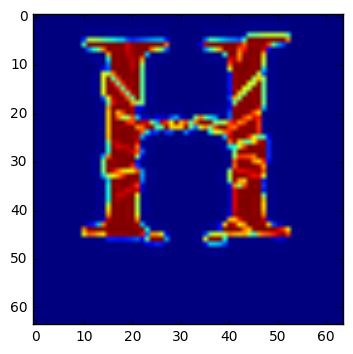

In [27]:
plt.imshow(imgH)

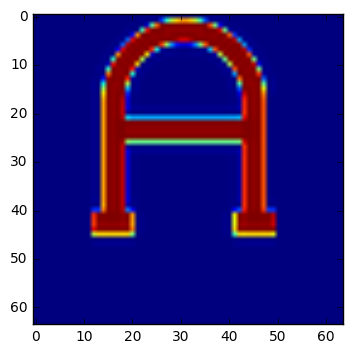

In [28]:
plt.imshow(As[0])

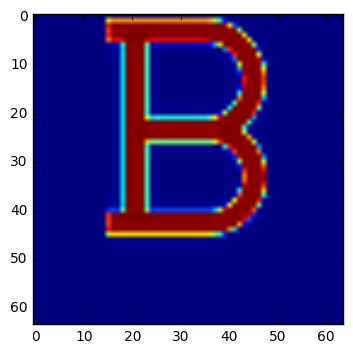

In [29]:
plt.imshow(Bs[0])

In [30]:
print(As.shape)
print(Bs.shape)

(10000, 64, 64)
(10000, 64, 64)


In [31]:
As_reshaped = As.reshape((smallDataSize, 64*64))
print(As_reshaped.shape)

Bs_reshaped = Bs.reshape((smallDataSize, 64*64))
print(Bs_reshaped.shape)

(10000, 4096)
(10000, 4096)


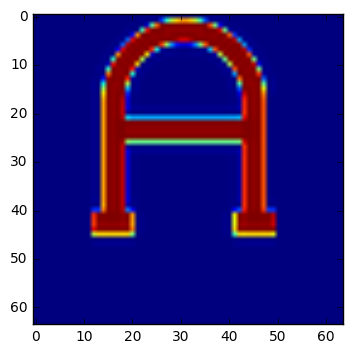

In [32]:
plt.imshow(As_reshaped[0,:].reshape((64,64)))

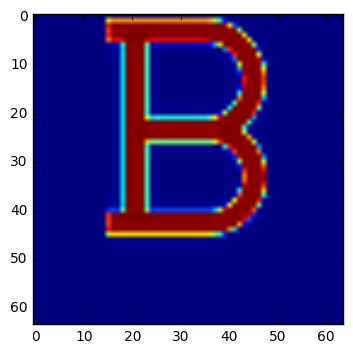

In [33]:
plt.imshow(Bs_reshaped[0,:].reshape((64,64)))

In [ ]:
import sklearn

class VectorRegression():
    def __init__(self):
        self.clf = svm.SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
                            kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

    def fit(self, X, y):
        n, m = y.shape
        # Fit a separate regressor for each column of y
        self.estimators_ = [sklearn.base.clone(self.clf).fit(X, y[:, i])
                               for i in range(m)]
        return self

    def predict(self, X):
        # Join regressors' predictions
        res = [est.predict(X)[:, np.newaxis] for est in self.estimators_]
        return np.hstack(res)

In [ ]:
%%timeit
vr = VectorRegression()
model = vr.fit(As_reshaped, Bs_reshaped)

In [ ]:
from sklearn.svm import libsvm
libsvm.set_verbosity_wrap(True)
clf = svm.LinearSVR(verbose=3)
clf.fit(As_reshaped, Bs_reshaped[:,0])